In [84]:
import pandas as pd
import plotly.express as px



In [85]:

from io import BytesIO
import requests
spreadsheet_id = '1OdjccfGlv3lsuiWgIAHbE8id91FpVaU2EsaZo5kknaA'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
train = pd.read_csv(BytesIO(r.content))


In [86]:
def get_info(df):

    print("Head:")
    display(df.head())
    print()
    
    print("Info:")
    display(df.info())
    print()
    
    print("Description of quantitative parameters:")
    display(df.describe())
    print()
    
    print("Description of categorical parameters:")
    display(df.describe(include='object'))
    print()
    
    print("Columns with NaN values:")
    display(df.isna().sum())
    print()
    
    print("Shape:")
    display(df.shape)
    print()
    
    print("Number of duplicated rows:")
    display(df.duplicated().sum())  

In [87]:
get_info(train)

Head:


,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating
0,2016-01-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,2381060,2
1,2016-02-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,-665480,2
2,2016-03-01,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,1,0,2
3,2017-11-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1
4,2017-12-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   MMM-YY                19104 non-null  object
 1   Emp_ID                19104 non-null  int64 
 2   Age                   19104 non-null  int64 
 3   Gender                19104 non-null  object
 4   City                  19104 non-null  object
 5   Education_Level       19104 non-null  object
 6   Salary                19104 non-null  int64 
 7   Dateofjoining         19104 non-null  object
 8   LastWorkingDate       1616 non-null   object
 9   Joining Designation   19104 non-null  int64 
 10  Designation           19104 non-null  int64 
 11  Total Business Value  19104 non-null  int64 
 12  Quarterly Rating      19104 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 1.9+ MB


None


Description of quantitative parameters:


,Emp_ID,Age,Salary,Joining Designation,Designation,Total Business Value,Quarterly Rating
count,19104.000000,19104.000000,19104.000000,19104.000000,19104.000000,1.910400e+04,19104.000000
mean,1415.591133,34.650283,65652.025126,1.690536,2.252670,5.716621e+05,2.008899
std,810.705321,6.264471,30914.515344,0.836984,1.026512,1.128312e+06,1.009832
min,1.000000,21.000000,10747.000000,1.000000,1.000000,-6.000000e+06,1.000000
25%,710.000000,30.000000,42383.000000,1.000000,1.000000,0.000000e+00,1.000000
50%,1417.000000,34.000000,60087.000000,1.000000,2.000000,2.500000e+05,2.000000
75%,2137.000000,39.000000,83969.000000,2.000000,3.000000,6.997000e+05,3.000000
max,2788.000000,58.000000,188418.000000,5.000000,5.000000,3.374772e+07,4.000000



Description of categorical parameters:


,MMM-YY,Gender,City,Education_Level,Dateofjoining,LastWorkingDate
count,19104,19104,19104,19104,19104,1616
unique,24,2,29,3,869,493
top,2016-01-01,Male,C20,Bachelor,2012-07-23,2017-07-29
freq,1022,11103,1008,6864,192,70



Columns with NaN values:


MMM-YY                      0
Emp_ID                      0
Age                         0
Gender                      0
City                        0
Education_Level             0
Salary                      0
Dateofjoining               0
LastWorkingDate         17488
Joining Designation         0
Designation                 0
Total Business Value        0
Quarterly Rating            0
dtype: int64


Shape:


(19104, 13)


Number of duplicated rows:


0

In [88]:
train['LastWorkingDate'].count()/len(train['Emp_ID'].unique())

0.6787064258714826

In [89]:
train['date'] = pd.to_datetime(train['MMM-YY'], format='%Y-%m-%d')

## Add churn column


In [90]:
# train.pivot_table(index='Emp_ID', values={'Salary'}, columns='')

In [91]:
def mapper(row):
  if pd.isna(row['LastWorkingDate']):
    return False
  return True


In [92]:
train['churn'] = train.apply(mapper, axis=1)


In [93]:
train_churn = train.query('churn == True')

In [94]:
emp_churn = train_churn['Emp_ID'].unique()

In [95]:
def mapper_left(row):
  if row['Emp_ID'] in emp_churn:
    return True
  return False

train['left'] = train.apply(mapper_left, axis=1)
# emp_churn = train_churn['Emp_ID'].unique()

In [96]:
train.head()

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating,date,churn,left
0,2016-01-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,2381060,2,2016-01-01,False,True
1,2016-02-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,-665480,2,2016-02-01,False,True
2,2016-03-01,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,1,0,2,2016-03-01,True,True
3,2017-11-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1,2017-11-01,False,False
4,2017-12-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1,2017-12-01,False,False


### How many entries are there for each employee?

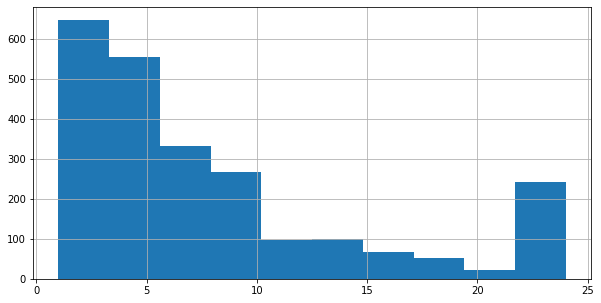

In [97]:
train.groupby('Emp_ID')['churn'].count().hist(figsize=(10,5))

There are around 200 employees with more than 20 entries

## Let's check different features for employees who left and stayed

### Let's create a table with one entry per employee and check quantitative features

In [98]:
train_pivot=train.pivot_table(index={'Emp_ID', 'left'}, values={'Age', 'Salary', 'Joining Designation', 'Designation', 'Total Business Value',	'Quarterly Rating'}, aggfunc='mean')

In [99]:
train_pivot.head()

Age  Designation  ...    Salary  Total Business Value
left  Emp_ID                          ...                                
False 2       31.000000          2.0  ...   67016.0          0.000000e+00
      6       31.000000          3.0  ...   78728.0          2.530000e+05
      11      28.000000          1.0  ...   42172.0          0.000000e+00
      14      39.000000          3.0  ...   19734.0          0.000000e+00
      25      29.666667          3.0  ...  102077.0          1.514630e+06

[5 rows x 6 columns]

In [100]:
train_pivot = train_pivot.reset_index()

In [101]:
def plot_graphs(df, feature):
  fig = px.histogram(df, x=feature, color='left', title=' ', color_discrete_sequence=px.colors.qualitative.Pastel)
  fig.show()

  fig = px.box(df, y=feature, color_discrete_sequence=px.colors.qualitative.Pastel)
  fig.show()

### Age

In [102]:
plot_graphs(train_pivot, 'Age')

### Designation

In [103]:
plot_graphs(train_pivot, 'Joining Designation')

In [104]:
plot_graphs(train_pivot, 'Designation')

### Quarterly Rating

In [105]:
plot_graphs(train_pivot, 'Quarterly Rating')

### Salary

In [106]:
plot_graphs(train_pivot, 'Salary')

### Total Business Value

In [107]:
plot_graphs(train_pivot, 'Total Business Value')

### Gender

In [108]:
# fig = px.histogram(train, x='Gender', color='left', title=' ', color_discrete_sequence=px.colors.qualitative.Pastel)
# fig.show()

### City

In [109]:
# fig = px.histogram(train, x='City', color='left', title=' ', color_discrete_sequence=px.colors.qualitative.Pastel)
# fig.show()

### Education level